<a href="https://colab.research.google.com/github/yjkno1/AI_TEAM/blob/main/iForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import IsolationForest

import ftplib
import os
import pickle
from os import unlink

# from google.colab import drive
# drive.mount('/gdrive', force_remount=True)


In [31]:
# df = pd.read_csv("/gdrive/My Drive/Colab Notebooks/file/ROUGHING_MILL_STAND10_ACTUAL_CURRENT_sample.csv", \
#                  parse_dates=['srvtime'], \
#                  infer_datetime_format=True)

# 위와같이 파일을 읽을때 date 컬럼의 타입을 지정할수 있고
# df['srvtime'] = pd.to_datetime(df['srvtime]) 이런형태로 나중에 변경 할수도 있다.

df = pd.read_csv("http://yjkno1.synology.me:8081/file/ROUGHING_MILL_STAND10_ACTUAL_CURRENT_sample.csv", \
                 parse_dates=['srvtime'], \
                 infer_datetime_format=True)

print(df.srvtime)

df.describe()

df.info()

# xData2 = df[df['srvtime'] >= '2021-03-10 15:20']
# xData2

df

0         2021-02-18 17:24:47.313000+09:00
1         2021-02-18 17:24:48.297000+09:00
2         2021-02-18 17:24:49.297000+09:00
3         2021-02-18 17:24:50.301000+09:00
4         2021-02-18 17:24:51.290000+09:00
                        ...               
1047047   2021-03-10 15:21:37.683000+09:00
1047048   2021-03-10 15:21:38.683000+09:00
1047049   2021-03-10 15:21:39.683000+09:00
1047050   2021-03-10 15:21:40.684000+09:00
1047051   2021-03-10 15:21:41.668000+09:00
Name: srvtime, Length: 1047052, dtype: datetime64[ns, pytz.FixedOffset(540)]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047052 entries, 0 to 1047051
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype                                
---  ------   --------------    -----                                
 0   tag      1047052 non-null  object                               
 1   srvtime  1047052 non-null  datetime64[ns, pytz.FixedOffset(540)]
 2   value    1047052 non-null  float64                   

,tag,srvtime,value
0,SRL_2.2YH70.ROUGHING_MILL_STAND10_ACTUAL_CURRENT,2021-02-18 17:24:47.313000+09:00,209.6
1,SRL_2.2YH70.ROUGHING_MILL_STAND10_ACTUAL_CURRENT,2021-02-18 17:24:48.297000+09:00,213.6
2,SRL_2.2YH70.ROUGHING_MILL_STAND10_ACTUAL_CURRENT,2021-02-18 17:24:49.297000+09:00,219.6
3,SRL_2.2YH70.ROUGHING_MILL_STAND10_ACTUAL_CURRENT,2021-02-18 17:24:50.301000+09:00,214.9
4,SRL_2.2YH70.ROUGHING_MILL_STAND10_ACTUAL_CURRENT,2021-02-18 17:24:51.290000+09:00,211.3
...,...,...,...
1047047,SRL_2.2YH70.ROUGHING_MILL_STAND10_ACTUAL_CURRENT,2021-03-10 15:21:37.683000+09:00,273.4
1047048,SRL_2.2YH70.ROUGHING_MILL_STAND10_ACTUAL_CURRENT,2021-03-10 15:21:38.683000+09:00,257.8
1047049,SRL_2.2YH70.ROUGHING_MILL_STAND10_ACTUAL_CURRENT,2021-03-10 15:21:39.683000+09:00,282.0
1047050,SRL_2.2YH70.ROUGHING_MILL_STAND10_ACTUAL_CURRENT,2021-03-10 15:21:40.684000+09:00,264.4


**index 를 srvtime으로 재설정 하고 date의 분으로 평균값 구하여 재구성 한다.**


In [32]:

df=df.set_index('srvtime').resample("1T").mean().reset_index()

df['value']=round(df['value'], 1)

df


,srvtime,value
0,2021-02-18 17:24:00+09:00,215.1
1,2021-02-18 17:25:00+09:00,240.5
2,2021-02-18 17:26:00+09:00,222.5
3,2021-02-18 17:27:00+09:00,214.7
4,2021-02-18 17:28:00+09:00,214.5
...,...,...
28673,2021-03-10 15:17:00+09:00,214.0
28674,2021-03-10 15:18:00+09:00,214.9
28675,2021-03-10 15:19:00+09:00,214.4
28676,2021-03-10 15:20:00+09:00,268.1


In [33]:
df['hour']=df.srvtime.dt.hour

df['weekday']=pd.Categorical(df.srvtime.dt.strftime('%A'), categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
df

,srvtime,value,hour,weekday
0,2021-02-18 17:24:00+09:00,215.1,17,Thursday
1,2021-02-18 17:25:00+09:00,240.5,17,Thursday
2,2021-02-18 17:26:00+09:00,222.5,17,Thursday
3,2021-02-18 17:27:00+09:00,214.7,17,Thursday
4,2021-02-18 17:28:00+09:00,214.5,17,Thursday
...,...,...,...,...
28673,2021-03-10 15:17:00+09:00,214.0,15,Wednesday
28674,2021-03-10 15:18:00+09:00,214.9,15,Wednesday
28675,2021-03-10 15:19:00+09:00,214.4,15,Wednesday
28676,2021-03-10 15:20:00+09:00,268.1,15,Wednesday


**Value, 요일(weekday) 컬럼에서 weekday 컬럼으로 group by하고 평균값을 구해서 Gratph 표시**

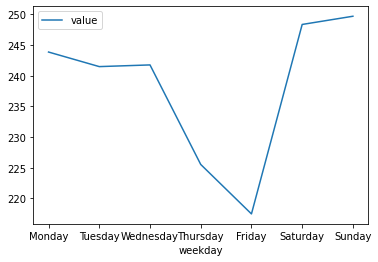

In [5]:
df[['value','weekday']].groupby('weekday').mean().plot()

**Value, 시간(hour) 컬럼에서 hour 컬럼으로 groupy하고 평균값을 구해서 Gratph 표시**

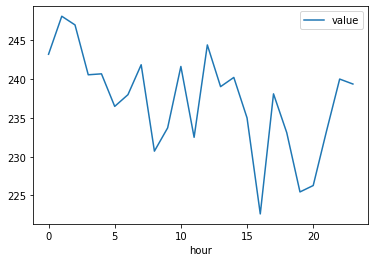

In [6]:
df[['value','hour']].groupby('hour').mean().plot()

**Line 그래프 API를 사용해서 데이터 시각화**

In [34]:
import plotly.express as px

fig = px.line(df.reset_index(), x='srvtime', y='value', title='ROUGHING_MILL_STAND10_ACTUAL_CURRENT')

# 범위를 선택해서 slider로 조절함.
fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

**Model 만들기**

In [35]:
# 랜덤 스테이트 수치 설정하기
state_value = np.random.RandomState(20)

# IsolationForest 모델 만들기
isol = IsolationForest(n_estimators=100, max_samples=128, contamination=float(0.004), random_state=state_value) 

# isol = IsolationForest(n_estimators=50, max_samples=128, contamination=float(0.004), \
#                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=state_value, verbose=0,behaviour="new")

# print(state_value.get_state)


In [39]:
# DataFrame Array -> array 컨버팅
# IsolationForest 파라미터에 필요

xData = df #df[df['srvtime'] >= '2021-03-10']

# 정상치 데이터로 트레이닝
xData2 = df[df['srvtime'] >='2021-02-24'][df['srvtime'] <= '2021-03-03']

xData2['value'].fillna(0, inplace = True)

xData['value'].fillna(0, inplace = True)

print(xData2)
# old
#x_train_df = np.array(xData.value)
#print( x_train_df)
# 1차원 배열을 2차원 배열로 변경
#x_train = x_train_df.reshape(-1,1)
#print(x_train)

# 만들어 둔 데이터셋에 알고리즘 피팅시키기
#isol.fit(x_train)

isol.fit(xData2[["value"]])

# y_pred_train = isol.predict(x_train)

# print(df.iloc[2])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



                        srvtime  value  hour    weekday
7596  2021-02-24 00:00:00+09:00    0.0     0  Wednesday
7597  2021-02-24 00:01:00+09:00    0.0     0  Wednesday
7598  2021-02-24 00:02:00+09:00    0.0     0  Wednesday
7599  2021-02-24 00:03:00+09:00    0.0     0  Wednesday
7600  2021-02-24 00:04:00+09:00    0.0     0  Wednesday
...                         ...    ...   ...        ...
17672 2021-03-02 23:56:00+09:00  228.9    23    Tuesday
17673 2021-03-02 23:57:00+09:00  241.3    23    Tuesday
17674 2021-03-02 23:58:00+09:00  239.1    23    Tuesday
17675 2021-03-02 23:59:00+09:00  226.6    23    Tuesday
17676 2021-03-03 00:00:00+09:00  225.2     0  Wednesday

[10081 rows x 4 columns]


IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.004,
                max_features=1.0, max_samples=128, n_estimators=100,
                n_jobs=None,
                random_state=RandomState(MT19937) at 0x7F680A3F7AF0, verbose=0,
                warm_start=False)

In [12]:
# ftp 접속 후 ftp객체 반환
def ftp_login(host, port, user, password):
  ftp=ftplib.FTP()
  ftp.connect(host,port)
  ftp.login(user, password)
  ftp.cwd("./")
  return ftp

# model을 ftp로 업로드
def save_model_to_ftp(ftp, filename):
  myfile = open(filename,'wb')
  # Save model
  pickle.dump(isol, myfile)
  ftpFile = open(filename, 'rb')
  ftp.storbinary("STOR /share/"+filename, ftpFile)
  myfile.close()
  ftpFile.close()

# ftp에서 model을 Load
def load_model_to_ftp(ftp, filename):
  myfile = open(filename,'wb')
  ftp.retrbinary("RETR /share/"+filename, myfile.write)
  myfile.close()
  ftpFile = open(filename, 'rb')
  isol = pickle.load(ftpFile)
  ftpFile.close()
  return isol



**생성한 모델을 저장한다**

In [40]:

filename="iForest.model"

ftp = ftp_login("yjkno1.synology.me", 2121, "ftp_user", "wnsxhtm1212")

# Model 저장하기
save_model_to_ftp(ftp, filename)

# Model 불러오기
i_sol = load_model_to_ftp(ftp, filename)

print(i_sol)

# ftp.close

# unlink(filename)

# # save model


# # Save pickle
# with open("/gdrive/My Drive/Colab Notebooks/file/iForest.model","wb") as fw:
#   pickle.dump(isol, fw)
 
# # Load pickle
# with open("/gdrive/My Drive/Colab Notebooks/file/iForest.model","rb") as fr:
#   l_isol = pickle.load(fr)

# print(l_isol)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.004,
                max_features=1.0, max_samples=128, n_estimators=100,
                n_jobs=None,
                random_state=RandomState(MT19937) at 0x7F680A3F7D10, verbose=0,
                warm_start=False)


**비정상 판단 유무**


*   score가 1에 가까우면 비정상
*   score가 0.5 이하이면 정상 데이터로 판단
*   만약 모든 score가 0.5에 가깝다면 전체 데이터에서 이상치를 발견하지 못한것으로 간주할 수 있음



In [41]:
#i_sol.score_samples(xData[['value']])
isol.score_samples(xData[['value']])

array([-0.46586383, -0.44070305, -0.46961346, ..., -0.47047173,
       -0.48855881, -0.61591263])

**모델에 예측하여 정상과 비정상 구분**


sklearn에서 Isolation Forest로 predict를 한 결과는 이상치 -1, 정상치 1로 리턴


In [42]:
xData['outliers']=pd.Series(isol.predict(xData[['value']])).apply(lambda x: 'yes' if (x == -1) else 'no' )

print(xData)
print(xData[xData.outliers=='yes'].count())
print(xData[xData.outliers=='no'].count())


                        srvtime  value  hour    weekday outliers
0     2021-02-18 17:24:00+09:00  215.1    17   Thursday       no
1     2021-02-18 17:25:00+09:00  240.5    17   Thursday       no
2     2021-02-18 17:26:00+09:00  222.5    17   Thursday       no
3     2021-02-18 17:27:00+09:00  214.7    17   Thursday       no
4     2021-02-18 17:28:00+09:00  214.5    17   Thursday       no
...                         ...    ...   ...        ...      ...
28673 2021-03-10 15:17:00+09:00  214.0    15  Wednesday       no
28674 2021-03-10 15:18:00+09:00  214.9    15  Wednesday       no
28675 2021-03-10 15:19:00+09:00  214.4    15  Wednesday       no
28676 2021-03-10 15:20:00+09:00  268.1    15  Wednesday       no
28677 2021-03-10 15:21:00+09:00  282.8    15  Wednesday       no

[28678 rows x 5 columns]
srvtime     397
value       397
hour        397
weekday     397
outliers    397
dtype: int64
srvtime     28281
value       28281
hour        28281
weekday     28281
outliers    28281
dtype: int6

**Scatter 그래프 API를 사용하여 데이터 시각화**


In [43]:
fig = px.scatter(xData.reset_index(), x='srvtime', y='value', color='outliers', hover_data=['weekday', 'hour'], title='Anomaly Data')

# 범위를 선택해서 slider로 조절함.(범위 슬라이더)
fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/express/_core.py:286: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



**여기서부턴 예전 버전**


In [ ]:
# X = [[-1.1], [0.3], [0.5], [100], [210]]
# y_pred_train = isol.predict(X)
# old
# y_pred_train = l_isol.predict(x_train)
y_pred_train = l_isol.predict(xData[["value"]])

print(y_pred_train)

xArr = []
yArr = []

sum = 0
for i, num in enumerate(y_pred_train):
  if num == -1: # -1은 이상 데이터, 1은 정상
    xArr.append(xData.iloc[i].srvtime)
    yArr.append(xData.iloc[i].value)
    sum += 1

print(sum)

#x_train_df["anomaly"]=y_pred_train
# outliers=x_train.loc[x_train["anomaly"]==-1]
# outlier_index=list(outliers.index)
# #print(outlier_index)
# #Find the number of anomalies and normal points here points classified -1 are anomalous
# print(feature_set['anomaly'].value_counts())

#y_pred_tran = ison.predict(df)

[1 1 1 ... 1 1 1]
96


In [ ]:
print(xArr)
print(yArr)

print(xData.value.count())
# print(x_train_df.size)
# df.insert(0, 'idx', value=range(df.value.count()))

#idxArr = np.array(df.idx)
idxArr = np.array(xData.srvtime)

#print(np.array(df.idx))

print(idxArr.size)

[Timestamp('2021-02-18 20:56:00+0900', tz='pytz.FixedOffset(540)', freq='T'), Timestamp('2021-02-18 20:58:00+0900', tz='pytz.FixedOffset(540)', freq='T'), Timestamp('2021-02-19 02:05:00+0900', tz='pytz.FixedOffset(540)', freq='T'), Timestamp('2021-02-19 16:00:00+0900', tz='pytz.FixedOffset(540)', freq='T'), Timestamp('2021-02-19 16:07:00+0900', tz='pytz.FixedOffset(540)', freq='T'), Timestamp('2021-02-19 16:10:00+0900', tz='pytz.FixedOffset(540)', freq='T'), Timestamp('2021-02-25 19:00:00+0900', tz='pytz.FixedOffset(540)', freq='T'), Timestamp('2021-02-26 08:01:00+0900', tz='pytz.FixedOffset(540)', freq='T'), Timestamp('2021-02-26 16:33:00+0900', tz='pytz.FixedOffset(540)', freq='T'), Timestamp('2021-02-27 06:08:00+0900', tz='pytz.FixedOffset(540)', freq='T'), Timestamp('2021-02-27 16:07:00+0900', tz='pytz.FixedOffset(540)', freq='T'), Timestamp('2021-02-27 16:09:00+0900', tz='pytz.FixedOffset(540)', freq='T'), Timestamp('2021-02-28 02:07:00+0900', tz='pytz.FixedOffset(540)', freq='T')

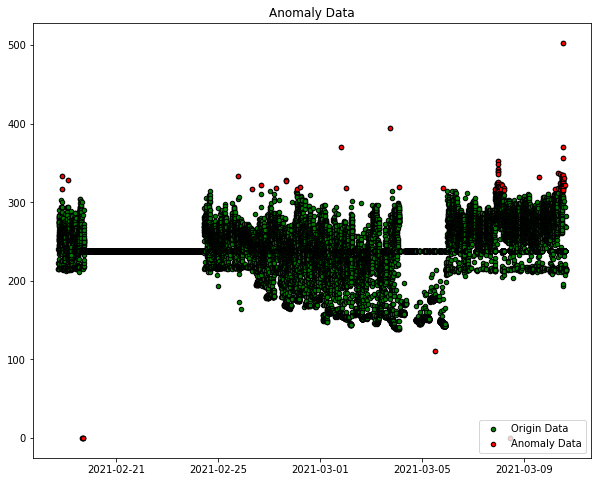

In [ ]:
import matplotlib as mpl
from matplotlib import pyplot as plt

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


# plt.plot(xArr, yArr)
# plt.xlabel('Index')
# plt.ylabel('value')
# plt.title('Anomaly Data')
# plt.show()

# Plotting generated data
plt.title("Anomaly Data")

#p1 = plt.scatter(idxArr, x_train_df, c='green',s=20*1, edgecolor='k')
p1 = plt.scatter(idxArr, xData[["value"]], c='green',s=20*1, edgecolor='k')

p2 = plt.scatter(xArr, yArr, c='red', s=20*1, edgecolor='k')
# p3 = plt.scatter(X_outliers.x1, X_outliers.x2, c='red',
#                 s=20*4, edgecolor='k')

plt.axis('tight')
# plt.xlim((-2, 5))
# plt.ylim((-2, 5))

plt.legend([p1, p2],['Origin Data', 'Anomaly Data'], loc="lower right")

# saving the figure
# plt.savefig('generated_data.png', dpi=300)

plt.show()